# What is the most optimal skill to learn for Data Analysts

### Methodology

1. Group skills to determin median salary and likelihood being in postings
2. Visualize median salary vs percent skill demand 
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [6]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [14]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = 100 * df_DA_skills['skill_count'] / DA_job_count

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [22]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove Nan Values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
  row_dict = ast.literal_eval(row)
  for key, value in row_dict.items():
    if key in technology_dict:
      technology_dict[key] += value
    else:
      technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
  technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sas',
  'sharepoint',
  'cognos',
  'looker',
  'visio',
  'excel',
  'splunk',
  'sap',
  'datarobot',
  'ms access',
  'msaccess',
  'alteryx',
  'spss',
  'esquisse',
  'power bi',
  'microstrategy',
  'spreadsheet',
  'qlik',
  'tableau',
  'outlook',
  'nuix',
  'dax',
  'powerbi',
  'ssis',
  'ssrs',
  'word',
  'powerpoint',
  'sheets'],
 'programming': ['f#',
  'mongodb',
  'sas',
  'c',
  'html',
  'perl',
  'sass',
  'javascript',
  'mongo',
  'solidity',
  'c#',
  'go',
  'matlab',
  'lisp',
  'typescript',
  'rust',
  'ocaml',
  'shell',
  't-sql',
  'erlang',
  'r',
  'python',
  'apl',
  'swift',
  'bash',
  'clojure',
  'groovy',
  'sql',
  'nosql',
  'visualbasic',
  'no-sql',
  'dart',
  'lua',
  'delphi',
  'css',
  'objective-c',
  'crystal',
  'vb.net',
  'visual basic',
  'c++',
  'cobol',
  'kotlin',
  'julia',
  'elixir',
  'assembly',
  'fortran',
  'golang',
  'vba',
  'haskell',
  'scala',
  'java',
  'powershell',
  'ruby',
  'pascal',
  '

In [24]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sas
0,analyst_tools,sharepoint
0,analyst_tools,cognos
0,analyst_tools,looker
0,analyst_tools,visio
...,...,...
9,sync,ringcentral
9,sync,mattermost
9,sync,rocketchat
9,sync,symphony


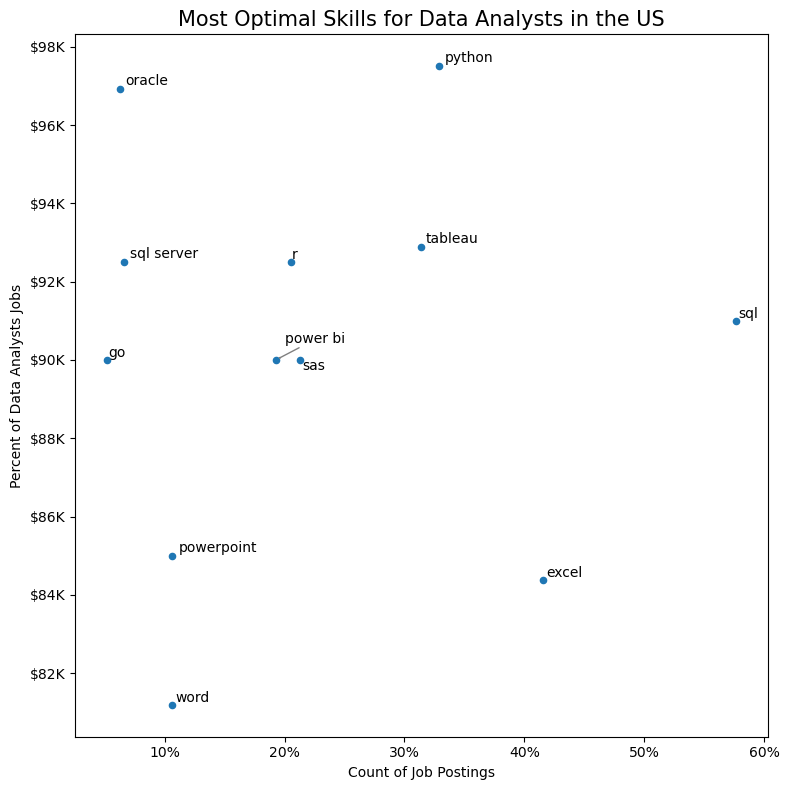

In [21]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary', figsize=(8,8))


# created a empty list where we will append the texts list that we will use for adjust_Text function
texts = []

# Plotting with Matplotlib giving text
for i, txt in enumerate(df_DA_skills_high_demand.index):
  texts.append(plt.text(x=df_DA_skills_high_demand['skill_percent'].iloc[i], y=df_DA_skills_high_demand['median_salary'].iloc[i], s=txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))
from matplotlib.ticker import PercentFormatter
# this is where we declare the ax=plt.gca()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Count of Job Postings')
plt.ylabel('Percent of Data Analysts Jobs')
plt.title('Most Optimal Skills for Data Analysts in the US', fontsize=15)

plt.tight_layout()
plt.show()

In [48]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


In [51]:
df_plot = df_plot.drop(4, axis=0)
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word
10,286,92500.00,6.574713,databases,sql server


sql
excel
python
tableau
sas
r
power bi
powerpoint
word
sql server
oracle
go


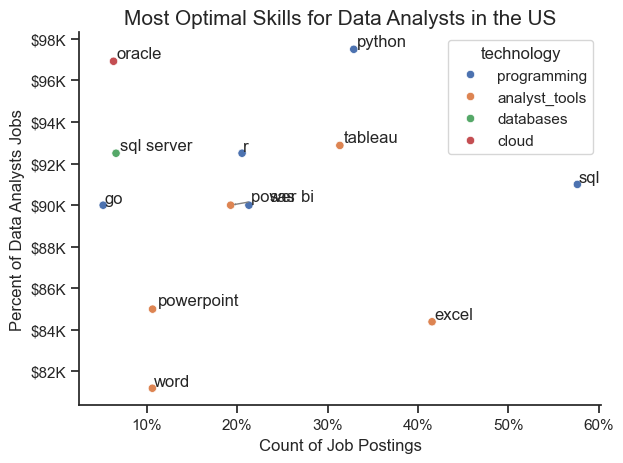

In [52]:
from adjustText import adjust_text

#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary', figsize=(8,8))
sns.set_theme(style='ticks')
sns.scatterplot(
  data=df_plot,
  x='skill_percent',
  y='median_salary',
  hue='technology'
)
sns.despine()

# created a empty list where we will append the texts list that we will use for adjust_Text function
texts = []

# Plotting with Matplotlib giving text
for i, txt in enumerate(df_plot['skills']):
  print(txt)
  texts.append(plt.text(x=df_plot['skill_percent'].iloc[i], y=df_plot['median_salary'].iloc[i], s=txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))
from matplotlib.ticker import PercentFormatter
# this is where we declare the ax=plt.gca()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Count of Job Postings')
plt.ylabel('Percent of Data Analysts Jobs')
plt.title('Most Optimal Skills for Data Analysts in the US', fontsize=15)

plt.tight_layout()
plt.show()